In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from src.data import retrieve

## Realiza Scraping de notícias do [G1 Fato ou Fake](https://g1.globo.com/fato-ou-fake/)

In [2]:
retrieve.run_g1ff_spider()

In [3]:
g1_df = pd.read_csv('../data/raw/scraping/g1ff.csv')
g1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   titulo          1612 non-null   object
 1   vinheta         1611 non-null   object
 2   tempo           1612 non-null   object
 3   data_explicita  1400 non-null   object
 4   autoria         1399 non-null   object
 5   lead            1611 non-null   object
 6   principal       1288 non-null   object
 7   texto           1400 non-null   object
 8   label           1612 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 113.5+ KB


<AxesSubplot:>

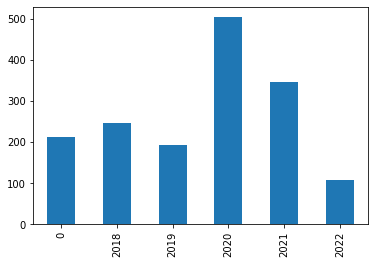

In [4]:
(
    g1_df
    .data_explicita
    .str
    .split('/', expand=True)[2]
    .fillna(0)
    .astype(int)
    .value_counts()
    .sort_index()
    .plot(kind='bar')
)

In [5]:
g1_df['ano'] = (
    g1_df
    .data_explicita
    .str
    .split('/', expand=True)[2]
    .fillna(0)
    .astype(int)
)

ano_contagem = (
    g1_df['ano']
    .value_counts()
    .sort_index()
    .rename_axis('ano')
    .reset_index(name='contagem')
)

ano_contagem

,ano,contagem
0,0,212
1,2018,248
2,2019,194
3,2020,504
4,2021,346
5,2022,108


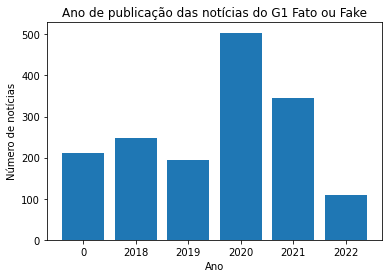

In [6]:
plt.bar(ano_contagem['ano'].astype(str), ano_contagem['contagem'])

plt.title('Ano de publicação das notícias do G1 Fato ou Fake')
plt.xlabel('Ano')
plt.ylabel('Número de notícias')

plt.show()

## Realiza Scraping de notícias do [Boatos.org](https://boatos.org/)
Nesse momento, especificamente  as notícias de política

In [8]:
# Via notebook
# retrieve.run_boatos_spider()

# Comentado porque está falhando em pegar todas as notícias; TimeoutError

In [9]:
# Via shell

!python ../src/data/boatos_scraping.py 

2022-06-20 17:35:08 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-06-20 17:35:08 [scrapy.utils.log] INFO: Versions: lxml 4.9.0.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.8.10 (default, Jun  8 2022, 20:37:38) - [GCC 11.2.0], pyOpenSSL 22.0.0 (OpenSSL 3.0.3 3 May 2022), cryptography 37.0.2, Platform Linux-5.15.0-37-generic-x86_64-with-glibc2.35
2022-06-20 17:35:08 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 'WARNING'}


In [10]:
boatos_df = pd.read_csv('../data/raw/scraping/boatos.csv')
boatos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titulo     2042 non-null   object
 1   data       1749 non-null   object
 2   autoria    2042 non-null   object
 3   tags       477 non-null    object
 4   principal  1863 non-null   object
 5   texto      2041 non-null   object
 6   label      2042 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 111.8+ KB


<AxesSubplot:>

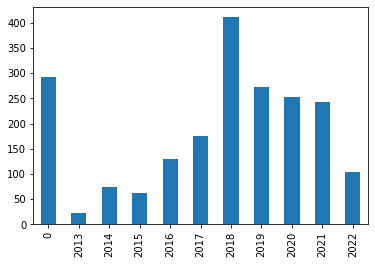

In [11]:
(
    boatos_df
    .data
    .str
    .split('/', expand=True)[2]
    .fillna(0)
    .astype(int)
    .value_counts()
    .sort_index()
    .plot(kind='bar')
)